In [50]:
# ------------------ Import Libraries ------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import pickle


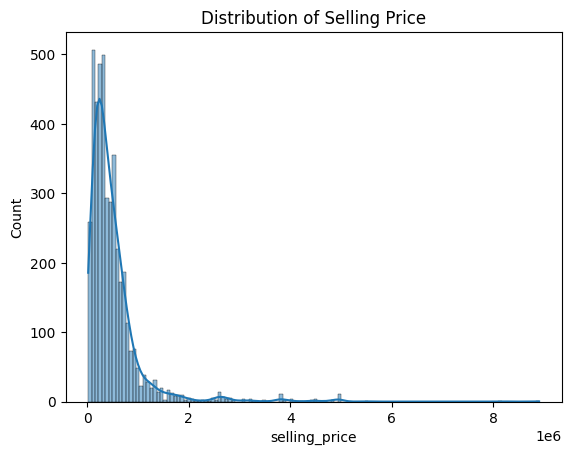

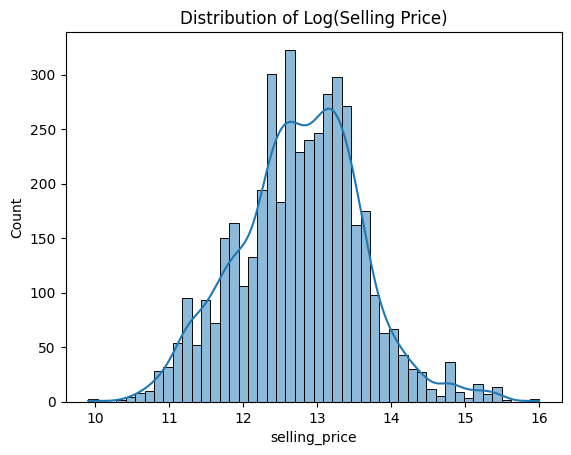

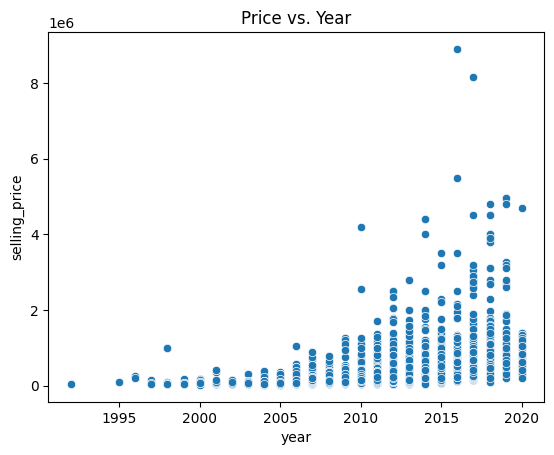

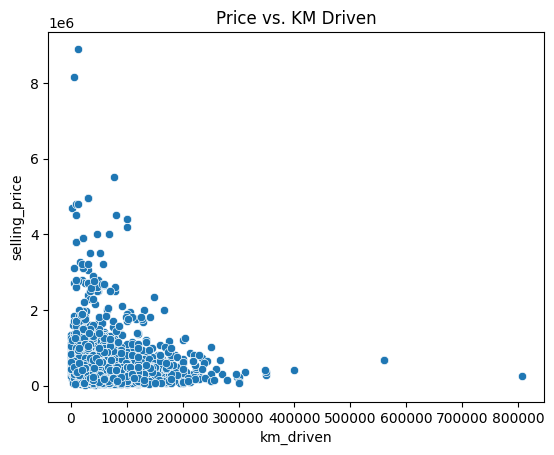

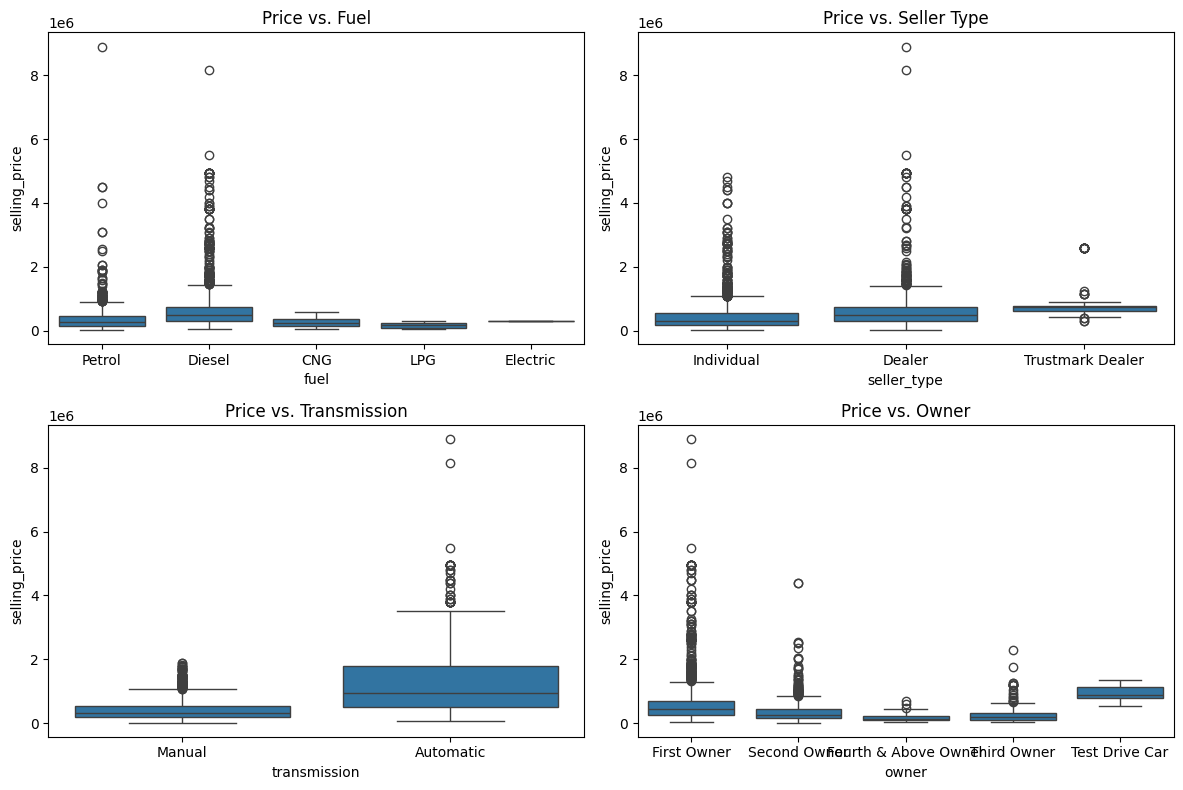

In [51]:
# ------------------ Load Dataset ------------------
df = pd.read_csv("dataset_1.csv")

# ------------------ EDA (Graphs) ------------------
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()

sns.histplot(np.log(df['selling_price']), kde=True)
plt.title('Distribution of Log(Selling Price)')
plt.show()

sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Price vs. Year')
plt.show()

sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Price vs. KM Driven')
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Price vs. Fuel')

plt.subplot(2, 2, 2)
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.title('Price vs. Seller Type')

plt.subplot(2, 2, 3)
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Price vs. Transmission')

plt.subplot(2, 2, 4)
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title('Price vs. Owner')

plt.tight_layout()
plt.show()

In [52]:
# ------------------ Feature Engineering ------------------
df['car_age'] = 2025 - df['year']
df['brand'] = df['name'].str.split().str[0]

# Remove columns not needed
df = df.drop(['name','year'], axis=1)

In [53]:
# ------------------ Define Features & Target ------------------
X = df.drop('selling_price', axis=1)
y = df['selling_price']

cat_cols = ['fuel','seller_type','transmission','owner','brand']
num_cols = ['km_driven','car_age']

In [54]:
# ------------------ Preprocessing ------------------
preprocess = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

In [55]:

# ------------------ Model Pipeline ------------------
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', RandomForestRegressor(n_estimators=300, random_state=42))
])

In [56]:
# ------------------ Train Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------ Train Model ------------------
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [57]:
# ------------------ Evaluate Model ------------------
y_pred = model.predict(X_test)
print("✅ Model R2 Score:", r2_score(y_test, y_pred))
print("✅ MAE:", mean_absolute_error(y_test, y_pred))

✅ Model R2 Score: 0.7621694000032316
✅ MAE: 113533.461993371


In [58]:
# ------------------ User Input Section ------------------

print("\n----- Enter Vehicle Details -----")

old_price = int(input("Enter old buying price (₹): "))
km_driven = int(input("Enter km driven: "))
year = int(input("Enter manufacturing year: "))
fuel = input("Fuel Type (Petrol/Diesel/CNG/LPG): ")
seller_type = input("Seller Type (Individual/Dealer/Trustmark Dealer): ")
transmission = input("Transmission (Manual/Automatic): ")
owner = input("Owner (First Owner/Second Owner/Third Owner/Other): ")
brand = input("Vehicle Brand (Example: Maruti, Hyundai, Honda): ")

car_age = 2025 - year

input_data = pd.DataFrame([{
    'km_driven': km_driven,
    'car_age': car_age,
    'fuel': fuel,
    'seller_type': seller_type,
    'transmission': transmission,
    'owner': owner,
    'brand': brand
}])

predicted_price = int(model.predict(input_data)[0])

print("\n----- Vehicle Price Prediction -----")
print(f"Old Vehicle Buying Price: ₹{old_price}")
print(f"Estimated Current Selling Price: ₹{predicted_price}")


----- Enter Vehicle Details -----

----- Vehicle Price Prediction -----
Old Vehicle Buying Price: ₹1000000
Estimated Current Selling Price: ₹415643


In [59]:
# ------------------ Save Model ------------------
pickle.dump(model, open("model.pkl", "wb"))

print("🎯 Model training complete & model.pkl saved successfully!")

🎯 Model training complete & model.pkl saved successfully!
